### discrete joint/marginal/conditional probability distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Setting seaborn style

#### Import ./modules/nb35.py

In [2]:
import sys
sys.path 
# Totes les carpetes on aquest kernel pot anar a buscar moduls, no tenim el nb35, podriem afegir el path aquí. 
# També en plan cutre es pot posar el fitxer nb25.py a dins la carpeta Lib

['C:\\Users\\jaume\\Notebooks\\nb04 - analisi multivariant',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\python311.zip',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\DLLs',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\Lib',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume',
 '',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\Lib\\site-packages',
 'C:\\Users\\jaume\\Notebooks\\modules',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\Lib\\site-packages\\win32',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\Lib\\site-packages\\win32\\lib',
 'C:\\Users\\jaume\\miniconda3\\envs\\entorn_1_Jaume\\Lib\\site-packages\\Pythonwin']

In [3]:
# Si tenim un entorn virtual i un lloc on hi han els scripts
# A l'entorn, hi podem afegir un fitxer "site_packages/conda.pth"
# L'editem i li posem el path dels moduls

# Anem a: 
# C:\Users\jaume\miniconda3\envs\entorn_1_Jaume\Lib\site-packages

# Creem el fitxer: 
# conda.pth

# Posem la ruta d'on creem els nostres moduls: 
# C:\Users\jaume\Notebooks\modules

In [4]:
import nb35

##### generate a dataset

In [5]:
# draw sample of size N
data = nb35.dataset_1(N = 100)
data.head()

,C0,C1,C2,D0,D1,D2
0,0.337002,0.396483,0.266515,E,C,A
1,0.600735,0.199586,0.199679,E,C,A
2,0.769906,0.169496,0.060598,E,D,A
3,0.551509,0.292761,0.155730,E,C,B
4,0.607631,0.277797,0.114573,D,C,B


##### compute the contingency table

In [6]:
X, Y = data['D0'], data['D1']
ct = nb35.ContingencyTable2D(X, Y)

In [7]:
# Total d'observacions
ct.n # Tal com hem especificat a la línia 5

100.0

Suma per un eix o per un altre, descripció univariant. Independentment dels valors que prengui l'altre. <br/>
Les sumes sumen el máxim.

In [8]:
ct.mrgY()

array([ 1., 19., 47., 21.,  7.,  3.,  2.])

In [9]:
ct.mrgX()

array([ 3., 11., 14., 38., 27.,  7.])

In [10]:
ct.counts

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  2.],
       [ 0.,  1.,  1.,  5.,  2.,  2.,  0.],
       [ 0.,  0.,  6.,  4.,  3.,  1.,  0.],
       [ 1.,  9., 19.,  8.,  1.,  0.,  0.],
       [ 0.,  4., 19.,  4.,  0.,  0.,  0.],
       [ 0.,  5.,  2.,  0.,  0.,  0.,  0.]])

El 2 de dalt a la dreta, en aquell dataframe hi ha dues files en les quals la X pren el valor A (primera fila) i la Y pren el valor G. Hi ha dues files en les quals la columna D0 pren el valor A i D1 pren el valor G.

Les files son valors de X

Les columnes valors de Y

Tal que: 

In [11]:
# Valors de X
np.sort(data.D0.unique())

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [12]:
# Valors de Y
np.sort(data.D1.unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [13]:
data.loc[(data.D0 == 'A') & (data.D1 == 'G')]

,C0,C1,C2,D0,D1,D2
6,0.518998,0.173786,0.307216,A,G,B
74,0.421079,0.253531,0.325390,A,G,B


In [14]:
# data.loc[(data.D0 == 'D') & (data.D1 == 'C')]
# Surten 19 registres

X = Data.D0 &rarr; factoritzem <br/>
A - 0<br/>
B - 1<br/>
C - 2<br/>
D - 3<br/>
E - 4<br/>
F - 5<br/>

Ho interpretem com els index de la matriu

Y = Data.D1<br/>
A - 0 <br/>
B - 1<br/>
...<br/>

El que fem es quan surten aquests valors, anem al index corresponent i sumem 1. 

Hem d'imaginar les etiquetes a sobre i al costat de la matriu.

---

Si tenim anys, poblacio, ciutat i busquem un patro, hauríem de fer els comptes conjunts (que es repeteixin les tres). El perfil me'l descriuen totes (o les variables que volguem).

In [15]:
ct.n, ct.cardX, ct.cardY

(100.0, 6, 7)

### Joint  distributions

The ***joint distribution*** of multiple variables is a probability distribution that describes the likelihood of different combinations of values for those variables occurring simultaneously. In simpler terms, it provides information about the probabilities associated with specific outcomes for all the variables considered together.

Let's consider two random variables, $X$ and $Y$. The joint distribution of $X$ and $Y$, denoted as $P(X, Y)$ or $f(x, y)$, provides the probabilities associated with each possible pair of values $(x, y)$ that $X$ and $Y$ can take on. Mathematically, this joint probability is represented as:

$$P\left(X = x_i, Y = y_j\right)\; \text{or} \; P\left(x_i, y_j\right)$$

Here, $x_i$ and $y_j$ represent specific values that $X$ and $Y$ can assume, respectively.

Properties:

   1. *Non-negativity*: $P\left(X = x_i, Y = y_j\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. *Normalization*: $\sum_{i,j}P\left(X = x_i, Y = y_j\right) = 1$, meaning that the sum of probabilities for all possible combinations of values equals 1.

The concept can be extended to more than two variables. For three variables $\left(X, Y, Z\right)$, the joint distribution is denoted as $P\left(X, Y, Z\right)$ or $f\left(x, y, z\right)$, and it describes the probabilities of all possible combinations of values for $X$, $Y$, and $Z$ occurring simultaneously.

- Distribució conjunta, com es distribueixen tots els valors.
- En una funció de distribució conjunta que descriu la probabilitat de que observem dos valors junts (a la vegada). És una probabilitat ha de ser més gran que 0 i no negativa. 
- Si les sumem totes (veure totes les possibles combinacions). Sumen 1. 

##### For two categorical variables the joint distribution is given by the normalized contingency table
- this is analogous to a multivariate histogram of proportions

In [31]:
# normalize
xy_joint = ct.counts /ct.n # Sería com l'histograma de proporcions (probabilitats)   
xy_joint, np.sum(xy_joint)

(array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02],
        [0.  , 0.01, 0.01, 0.05, 0.02, 0.02, 0.  ],
        [0.  , 0.  , 0.06, 0.04, 0.03, 0.01, 0.  ],
        [0.01, 0.09, 0.19, 0.08, 0.01, 0.  , 0.  ],
        [0.  , 0.04, 0.19, 0.04, 0.  , 0.  , 0.  ],
        [0.  , 0.05, 0.02, 0.  , 0.  , 0.  , 0.  ]]),
 1.0)

In [17]:
data_2 = nb35.dataset_1(N = 2850)
X_2, Y_2 = data_2['D0'], data_2['D1']
ct_2 = nb35.ContingencyTable2D(X_2, Y_2)
xy_joint_2 = ct_2.counts /ct_2.n
xy_joint_2[::-1], np.sum(xy_joint_2)

(array([[0.00035088, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.0045614 , 0.00315789, 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.00842105, 0.06736842, 0.0277193 , 0.        , 0.        ,
         0.        , 0.        ],
        [0.00385965, 0.0954386 , 0.13684211, 0.02631579, 0.        ,
         0.        , 0.        ],
        [0.00210526, 0.0477193 , 0.13754386, 0.11192982, 0.01859649,
         0.        , 0.        ],
        [0.00070175, 0.01192982, 0.05789474, 0.08807018, 0.05508772,
         0.00385965, 0.        ],
        [0.        , 0.00280702, 0.01263158, 0.02210526, 0.02491228,
         0.01473684, 0.00210526],
        [0.        , 0.        , 0.        , 0.00245614, 0.00350877,
         0.00350877, 0.00140351],
        [0.        , 0.        , 0.        , 0.        , 0.00035088,
         0.        , 0.        ]]),
 1.0)

##### Visualization of the joint distribution using a 2d histogram

In [24]:
# No acaba de funcionar
#fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
#axs.hist2d(pd.factorize(data['D1'])[0], pd.factorize(data['D0'])[0], bins = [ct.cardY, ct.cardX], cmap = plt.cm.Blues, density = False, alpha = 0.8)

# histograma amb tres dimensions, histograma de les combinacions

### Marginal  distributions

The ***marginal distributions*** provide the probabilities of each individual variable without considering the others. Mathematically, the marginal probabilities are represented as:

$$P\left(X = x_i\right),\; \forall x_{i}\in X;\quad P\left(Y = y_j\right),\; \forall y_{i}\in Y$$

Properties:

   1. *Non-negativity*: $\quad P\left(X = x_i\right) \geq 0, \quad \forall \left(x_i\right)$
  
   2. *Normalization*: $\quad \sum_{i}P\left(X = x_i\right) = 1$.

La que hem vist sempre.

##### The *marginal* distributions are given by the normalized marginal counts in the contingency table
- this is analogous to the histogram of proportions for each individual variable

In [19]:
# marginal counts
ct.mrgX(), ct.mrgY()

(array([ 3., 11., 14., 38., 27.,  7.]),
 array([ 1., 19., 47., 21.,  7.,  3.,  2.]))

In [20]:
# marginal density of X
# Per discret density and proportion és el mateix
ct.mrgX() /ct.n, np.sum(ct.mrgX() /ct.n)

(array([0.03, 0.11, 0.14, 0.38, 0.27, 0.07]), 1.0)

In [21]:
# marginal distribution of Y -> Li canviem el nom de density per això.
ct.mrgY() /ct.n, np.sum(ct.mrgY() /ct.n)

(array([0.01, 0.19, 0.47, 0.21, 0.07, 0.03, 0.02]), 1.0)

##### Visualization of the joint and marginal distributions using seaborn
- seaborn.jointplot() depicts the marginal distributions as *proportion histograms* at the corresponding axes.

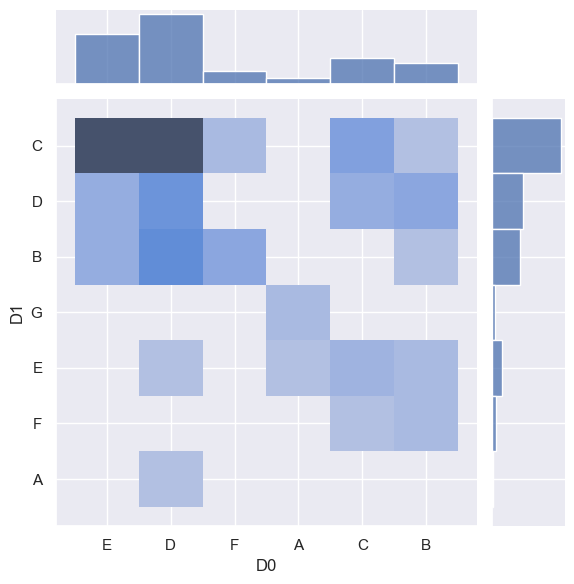

In [22]:
# Els ordena per freqüències o ho fa per ordre que es troba al dataset?¿?
sns.jointplot(data = data, x = 'D0', y = 'D1', kind = 'hist', bins = [ct.cardX, ct.cardY]);

### Conditional distributions

A conditional distribution is a probability distribution that describes the probability of one or more random variables given the knowledge of the values of one or more other variables.

For the simplest case of two random variables, the conditional distribution of $Y$ given $X$, denoted as $P\left(Y | X\right)$ or $f\left(y | x\right)$, represents the probability distribution of $Y$ when the value of $X$ is known to be $x$. 

Properties:

   1. *Non-negativity*: $P\left(Y = y_j| X = x_i\right) \geq 0, \quad \forall \left(x_i, y_j\right)$
  
   2. *Normalization*: $\sum_{j}P\left(Y = y_j| X = x_i\right) = 1$.

This can be extended to the conditional distribution of more than two variables. For example, the conditional distribution of X given Y and Z is denoted as \( P(X | Y, Z) \) or \( f(x | y, z) \).

##### For two categorical variables the conditional distribution is given by the normalized rows/columns of the contingency table
- this is analogous to a histogram of proportions for a given class

Condicionem una de les variables, si la x val tant, com es distribueix la y?<br/>
Per normalitzar, hem de dividir per la suma d'aquella fila (el total que en tenim per aquell valor)

In [23]:
# e.g. P(Y | X = 1)
yGx1 = ct.counts[1, :] /np.sum(ct.counts[1, :])
yGx1, np.sum(yGx1)

(array([0.        , 0.09090909, 0.09090909, 0.45454545, 0.18181818,
        0.18181818, 0.        ]),
 1.0)

In [32]:
# e.g. P(Y | X = 2)
yGx1 = ct.counts[2, :] /np.sum(ct.counts[2, :])
yGx1, np.sum(yGx1)

(array([0.        , 0.        , 0.42857143, 0.28571429, 0.21428571,
        0.07142857, 0.        ]),
 0.9999999999999999)

In [33]:
# e.g. P(X | Y = 2)
yGx1 = ct.counts[:, 2] /np.sum(ct.counts[:, 2])
yGx1, np.sum(yGx1)

(array([0.        , 0.0212766 , 0.12765957, 0.40425532, 0.40425532,
        0.04255319]),
 0.9999999999999999)

**The conditional distribution completes the relation between the join and the marginal distributions:**

$$P\left(X, Y\right) = P\left(X\right)\;P\left(Y|X\right) = P\left(Y\right)\;P\left(X|Y\right)$$

- P(X,Y) és distribució conjunta de x i y
- P(X) és la marginal de x
- P(X|Y) és la condicional de Y|X

### Flipada final:
Aquestes tres distribucions, compleixen una relació entre elles. <br/>
La distribució conjunta és igual a el producte de la marginal de una de les variables per la condicional de l'altre.

Això es el teorema de bayes (no exactament).